<a href="https://colab.research.google.com/github/suelen-prs/projeto_keras/blob/master/classifica%C3%A7%C3%A3o_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
identificacoes_treino.shape

(60000,)

Exploração dos dados

In [4]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

<ipython-input-5-46251712a5a6>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, imagem+1)


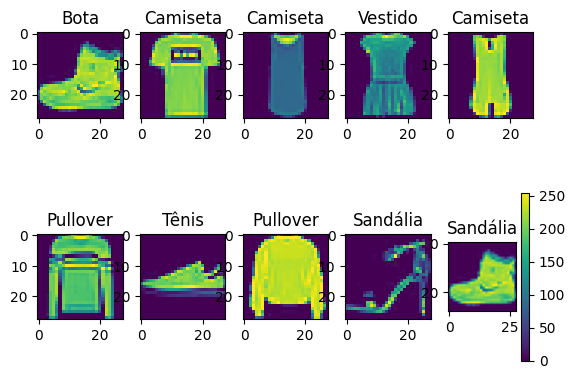

In [5]:
total_de_classificacoes = 10
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [6]:
imagens_treino = imagens_treino/float(255)


Criando, compilando e treinando e normalizando o modelo

In [35]:
#criando (normalizando com Dropout)
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
#compilando
adam = keras.optimizers.Adam(learning_rate=0.002)

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                                monitor='val-loss', save_best_only=True)]

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treinando 
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=480, epochs=5, validation_split=0.2, callbacks=parando_cedo) 

Epoch 1/5
 97/100 [============================>.] - ETA: 0s - loss: 0.6541 - accuracy: 0.7733

100/100 [==============================] - 4s 24ms/step - loss: 0.6478 - accuracy: 0.7751 - val_loss: 0.4497 - val_accuracy: 0.8461
Epoch 2/5
 97/100 [============================>.] - ETA: 0s - loss: 0.4305 - accuracy: 0.8485

100/100 [==============================] - 2s 17ms/step - loss: 0.4297 - accuracy: 0.8487 - val_loss: 0.3957 - val_accuracy: 0.8600
Epoch 3/5
 97/100 [============================>.] - ETA: 0s - loss: 0.3855 - accuracy: 0.8633

100/100 [==============================] - 2s 18ms/step - loss: 0.3849 - accuracy: 0.8633 - val_loss: 0.3714 - val_accuracy: 0.8667
Epoch 4/5
 99/100 [============================>.] - ETA: 0s - loss: 0.3561 - accuracy: 0.8729

100/100 [==============================] - 3s 27ms/step - loss: 0.3564 - accuracy: 0.8726 - val_loss: 0.3554 - val_accuracy: 0.8746
Epoch 5/5
 98/100 [============================>.] - ETA: 0s - loss: 0.3419 - accuracy: 0.8760

100/100 [==============================] - 2s 18ms/step - loss: 0.3415 - accuracy: 0.8762 - val_loss: 0.3544 - val_accuracy: 0.8727


Sumário do modelo

In [8]:
sumario_do_modelo = modelo.summary()
# resumo do modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [9]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.13547684,  0.06679006,  0.13580082, ...,  0.01530951,
        -0.01402524,  0.04866866],
       [ 0.02801666, -0.03527107,  0.07421159, ..., -0.00123306,
        -0.1823597 , -0.10596398],
       [ 0.01794756, -0.12310623, -0.07554467, ..., -0.04942496,
        -0.27670085, -0.06773229],
       ...,
       [-0.09482788,  0.15852672,  0.00782441, ..., -0.02486874,
        -0.0219325 ,  0.00129483],
       [-0.0591574 , -0.02494021,  0.02826538, ..., -0.03027196,
        -0.02754876,  0.07447064],
       [ 0.12724918,  0.06395333,  0.1515754 , ..., -0.04335419,
         0.07458482,  0.03103684]], dtype=float32)

In [10]:
pesos_camada_dense.shape

(784, 256)

In [11]:
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784,256)


In [12]:
#compilando
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treinando 
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2670 - accuracy: 0.8991 - val_loss: 0.3193 - val_accuracy: 0.8863
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2546 - accuracy: 0.9044 - val_loss: 0.3261 - val_accuracy: 0.8862
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2519 - accuracy: 0.9047 - val_loss: 0.3071 - val_accuracy: 0.8949
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2426 - accuracy: 0.9088 - val_loss: 0.3068 - val_accuracy: 0.8921
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2394 - accuracy: 0.9093 - val_loss: 0.3130 - val_accuracy: 0.8947


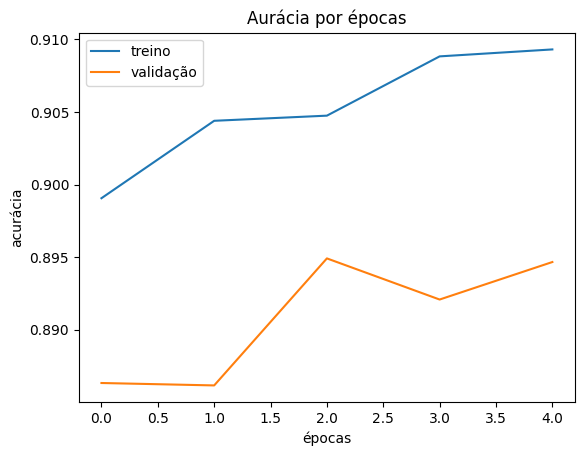

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Aurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [14]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

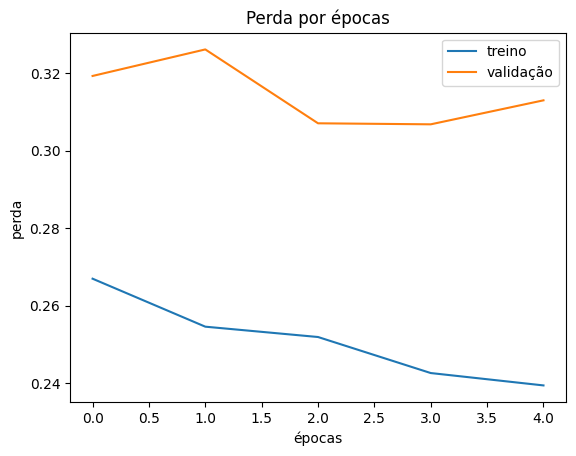

In [15]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [16]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [17]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [18]:
#modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])
modelo.layers[1].get_weights()

[array([[0.9898235 , 0.02341336, 0.41634592, ..., 0.5055725 , 0.26768658,
         0.9012942 ],
        [0.14319256, 0.19855997, 0.43568978, ..., 0.3234023 , 0.7024245 ,
         0.62756395],
        [0.6671831 , 0.6037669 , 0.7339915 , ..., 0.45764926, 0.5717677 ,
         0.8419618 ],
        ...,
        [0.59802365, 0.9486162 , 0.65489304, ..., 0.4395209 , 0.85804284,
         0.91054535],
        [0.16154492, 0.33847192, 0.16174765, ..., 0.8483073 , 0.76802135,
         0.45732483],
        [0.7801123 , 0.4527142 , 0.6182383 , ..., 0.0731665 , 0.6802427 ,
         0.74366426]], dtype=float32),
 array([ 0.34620288,  0.09162417,  0.27163318,  0.14461374,  0.25141177,
         0.31418192, -0.17202716, -0.21501932,  0.70838714,  0.3707949 ,
        -0.20755495, -0.28248036,  0.16639948,  0.5318686 , -0.13331805,
         0.18588714, -0.29457152, -0.01776149,  0.29164118, -0.03148967,
         0.08868273,  0.1054852 , -0.03521078,  0.5076286 ,  0.16165031,
         0.46068168,  0.14302

Salvando e carregando o modelo treinado

In [19]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [20]:
historico

In [21]:
historico.history

{'loss': [0.2669672667980194,
  0.2545904815196991,
  0.2519242465496063,
  0.24262940883636475,
  0.23943786323070526],
 'accuracy': [0.8990625143051147,
  0.9043958187103271,
  0.9047499895095825,
  0.9088333249092102,
  0.9093124866485596],
 'val_loss': [0.31926214694976807,
  0.3261078894138336,
  0.3070516288280487,
  0.306787371635437,
  0.312976598739624],
 'val_accuracy': [0.8863333463668823,
  0.8861666917800903,
  0.8949166536331177,
  0.8920833468437195,
  0.8946666717529297]}

In [22]:
historico.history['accuracy']

[0.8990625143051147,
 0.9043958187103271,
 0.9047499895095825,
 0.9088333249092102,
 0.9093124866485596]

Visualizando as acurácias de treino e validação por época

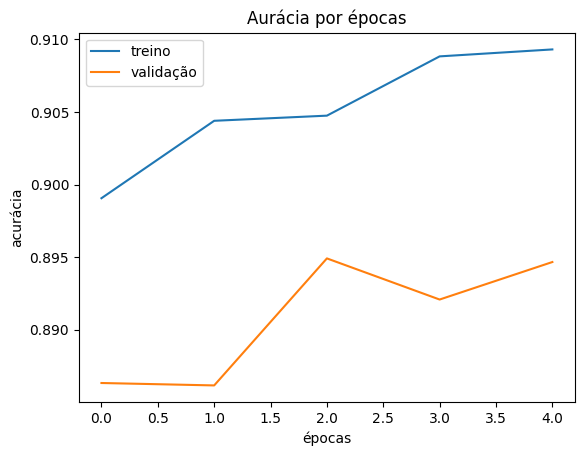

In [23]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Aurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

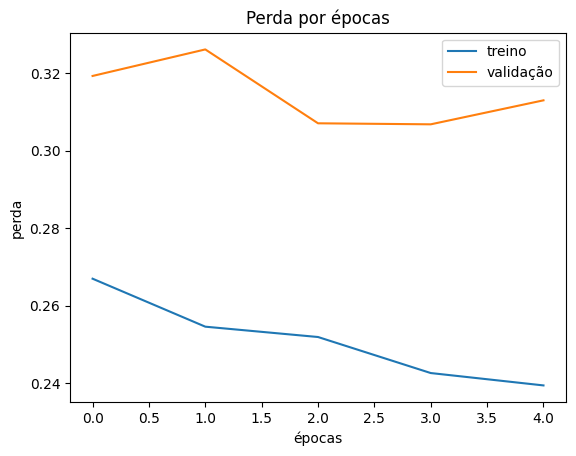

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [25]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ', np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])



313/313 [==============================] - 1s 2ms/step
resultado teste:  5
número da imagem de teste:  2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 5
número da imagem de teste:  2


Avaliando o modelo

In [26]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acuracia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 355425.2188 - accuracy: 0.1000
Perda do teste: 355425.21875
Acuracia do teste: 0.10000000149011612
